<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20II%20%3A%20Business%20Applications/Chapter%2014%3A%20Human%20Resources%20Analytics/14_5_Training_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Human Resources Analytics**
## Training Analytics

### **Data Driven Training & Development Plan Through Analytics**

In this usecase an analytics approcah was conducted to identify the best training method for employee to increase performance. The data set is a modified version of IBM HR Analytics Employee Attrition Data [(1)](https://drive.google.com/file/d/12FbkCWfxJJHTHtrRY5w4v90aQY-kdDEg/view?usp=sharing)

#### **Problem Definition:** 
* Which training method is more effective than other in terms of employee performance? 
* Are there any differences between different departments in terms of training method and performance?
* Can we predict employee performance through number of class trainings and online tranings? 

####**Importing Required Libraries and Components**

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import lightgbm as lgb

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


#### **Import Data**

In [ ]:
url = "https://drive.google.com/file/d/12FbkCWfxJJHTHtrRY5w4v90aQY-kdDEg/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df = df.drop(columns = "Unnamed: 0")
df.head()

,OrgFunction,ClassTrainingLastYear,OnlineTrainingWeeks,PerformanceRating
0,1,2,8.38,3.311207
1,1,2,3.39,2.960790
2,1,2,14.46,3.911701
3,2,2,3.00,3.308120
4,2,1,7.00,1.979006


In [ ]:
df.shape

(1102, 4)

The data set includes includes performance rating, department information,  and training types of 1102 employees of a company. 

In this use-case the **main question** is to understand which training type is more effective in terms of employee performance. There are multiple factors to evaluate the effectiveness of training: 
* **Performance Rating:** Observed employee performance is the most tangible output of training investments. In this usecase, effect of tranings on employee performance will be explored. 
* **Difference between Departments** Since the tranining needs of different departments could vary, the relationship between employee performance and training type will be explored on department level.

List of variables and their definitions can be seen below:


Variable Name  | Variable Description 
-------------------|------------------
OrgFunction       |Organizational department of the employee (0: Finance, 1: IT, 2: Sales)
ClassTrainingLastYear|Number of class trainings assigned to the employee last year
OnlineTrainingsWeeks|Number of online training weeks that employee finished last year 
PerformanceRating       |Last performance score of the employee




In [ ]:
# Encode Categorical Variable Organizational Department
# Transform categorical features

df["OrgFunction"] = np.where(df["OrgFunction"] == "1","IT",df["OrgFunction"])
df["OrgFunction"] = np.where(df["OrgFunction"] == "2","Sales",df["OrgFunction"])
df["OrgFunction"] = np.where(df["OrgFunction"] == "0","Finance",df["OrgFunction"])
df["OrgFunction"] = np.where(df["OrgFunction"] == "1","IT",df["OrgFunction"])
df["OrgFunction"] = df["OrgFunction"].astype("category")


In [ ]:
df["OrgFunction"].value_counts()

IT         709
Sales      350
Finance     43
Name: OrgFunction, dtype: int64

In [ ]:
# Check data types of the data set
df.dtypes

OrgFunction              category
ClassTrainingLastYear       int64
OnlineTrainingWeeks       float64
PerformanceRating         float64
dtype: object

In [ ]:
#Check Null values 
df.isna().sum()

OrgFunction              0
ClassTrainingLastYear    0
OnlineTrainingWeeks      0
PerformanceRating        0
dtype: int64

We can see **43*** Employees from **Finance**, **709** Employees from **IT** and **350** employees from **Sales**. 

The dataset does not include any null values.

####**Exploratory Data Analysis**

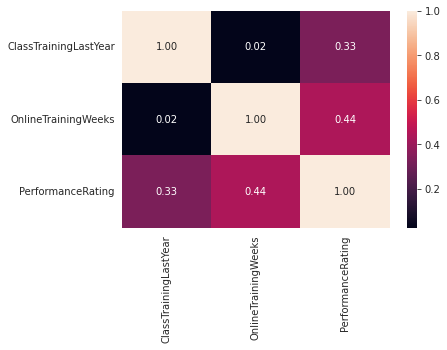

In [ ]:
##Correlation plot for Numeric Variables

data = df.drop(["OrgFunction"],axis=1)

tech_rets_corr= data.dropna().corr()
sns.heatmap(tech_rets_corr, annot=True, fmt='.2f')
plt.show()

We can see relatively high correlations between Performance Rating and traning types. 
* 'Online training weeks' is positively correlated with performance rating with a pearson coefficient of **0.44** 
* 'In Class Trainings' is positively correlated with performance rating with a pearson coefficient of **0.33**

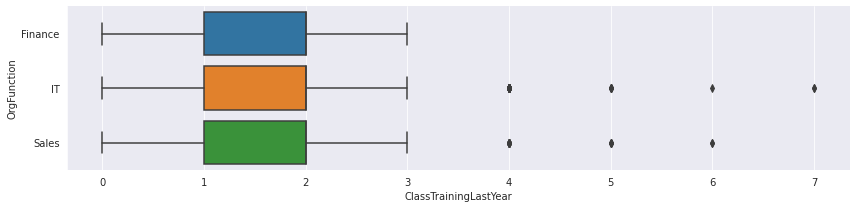

In [ ]:
#BOXPLOT FOR CLASS TRAINING
sns.catplot(x="ClassTrainingLastYear", y="OrgFunction",
                kind="box", orient="h", height=3, aspect=4,
                data=df)
plt.show()

In [ ]:
df.groupby("OrgFunction")["ClassTrainingLastYear"].describe()

,count,mean,std,min,25%,50%,75%,max
OrgFunction,,,,,,,,
Finance,43.0,1.534884,0.667220,0.0,1.0,2.0,2.0,3.0
IT,709.0,1.803949,0.929544,0.0,1.0,2.0,2.0,7.0
Sales,350.0,1.814286,0.967863,0.0,1.0,2.0,2.0,6.0


Boxplot analysis of Class training variable show that the distributions of three organizations are identical. 

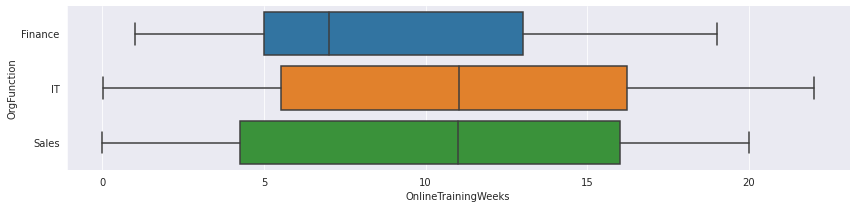

In [ ]:
#BOXPLOT FOR CLASS TRAINING
sns.catplot(x="OnlineTrainingWeeks", y="OrgFunction",
                kind="box", orient="h", height=3, aspect=4,
                data=df)
plt.show()

In [ ]:
df.groupby("OrgFunction")["OnlineTrainingWeeks"].describe()

,count,mean,std,min,25%,50%,75%,max
OrgFunction,,,,,,,,
Finance,43.0,8.837209,5.131278,1.00,5.00,7.00,13.00,19.00
IT,709.0,10.760423,6.128016,0.02,5.52,11.02,16.24,22.01
Sales,350.0,10.405714,6.205273,0.00,4.25,11.00,16.00,20.00


Boxplot analysis of Online Traning showed that IT and Sales departments conducted more onlinetraings than Finance.

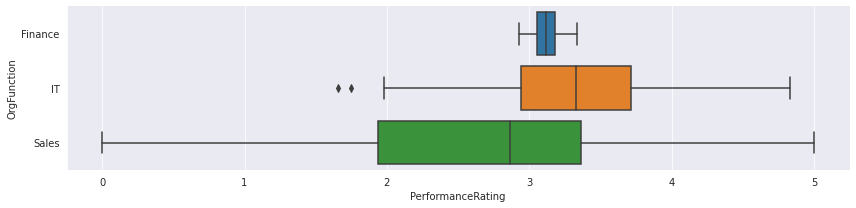

In [ ]:
#BOXPLOT FOR CLASS TRAINING
sns.catplot(x="PerformanceRating", y="OrgFunction",
                kind="box", orient="h", height=3, aspect=4,
                data=df)

plt.show()

In [ ]:
df.groupby("OrgFunction")["PerformanceRating"].describe()

,count,mean,std,min,25%,50%,75%,max
OrgFunction,,,,,,,,
Finance,43.0,3.124852,0.098965,2.928373,3.057271,3.116703,3.179222,3.335906
IT,709.0,3.327587,0.522082,1.654832,2.940722,3.329731,3.717197,4.834826
Sales,350.0,2.663931,0.862703,0.000000,1.938870,2.861223,3.363307,5.000000


Boxplot analysis of Performance Rating showed that,
* IT has higher average score than Finance and Sales
* Finance has a very narrow distribution with low variance. Standard deviation is 0.09, whereas standard deviation for IT is 0.52 and for Sales is 0.86
* Sales performance score is widely distributed than other two departments.  

Our exploratory data analysis showed that organizational function is a indicator for performance rating where IT has higher values. 

To understand the relationship between performance rating and online/class trainings, we first control the relationship between our target variable performance with other two numeric variables and then we drill down to the organizational department level.  

Text(0, 0.5, 'OnlineTrainingWeeks')

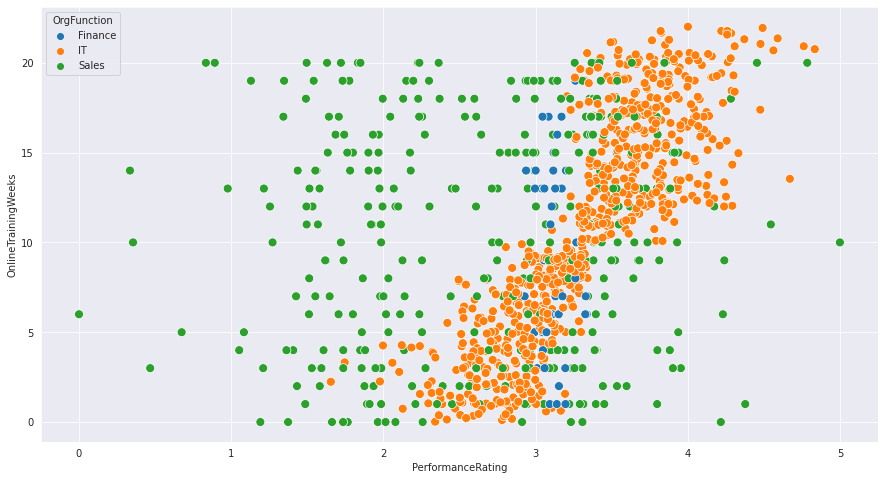

In [ ]:
# Plot performance and team evaluation score for managers to cluster groups

plt.figure(figsize=(15,8))

sns.scatterplot(data=df, x="PerformanceRating", y="OnlineTrainingWeeks", s=80, hue="OrgFunction")

#plt.axvline(2.24, 0,color="red")
#plt.axhline(54.2, 0,color="red")

plt.xlabel("PerformanceRating")
plt.ylabel("OnlineTrainingWeeks")


When we explore the relationship between performance rating and onlinetrainings, we can see a very strong correlation in IT department.  

In [ ]:
df.groupby("OrgFunction")[["PerformanceRating","OnlineTrainingWeeks"]].corr()

PerformanceRating  OnlineTrainingWeeks
OrgFunction                                                            
Finance     PerformanceRating             1.000000            -0.068544
            OnlineTrainingWeeks          -0.068544             1.000000
IT          PerformanceRating             1.000000             0.844443
            OnlineTrainingWeeks           0.844443             1.000000
Sales       PerformanceRating             1.000000             0.080319
            OnlineTrainingWeeks           0.080319             1.000000

The correlation table on organization department level show that, Performance scores and online trainings are strongly positively correlated in IT department(0.84) 

Text(0, 0.5, 'ClassTrainingLastYear')

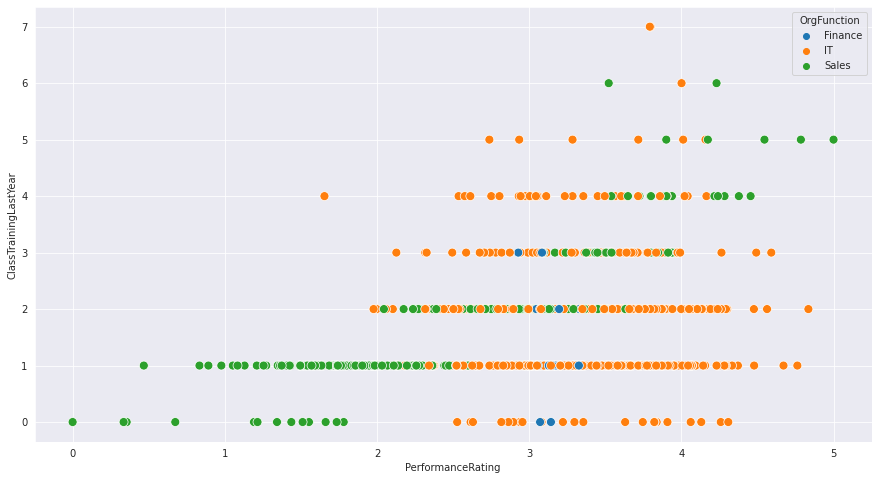

In [ ]:
# Plot performance and team evaluation score for managers to cluster groups

plt.figure(figsize=(15,8))

sns.scatterplot(data=df, x="PerformanceRating", y="ClassTrainingLastYear", s=80, hue="OrgFunction")

#plt.axvline(2.24, 0,color="red")
#plt.axhline(54.2, 0,color="red")

plt.xlabel("PerformanceRating")
plt.ylabel("ClassTrainingLastYear")

In [ ]:
df.groupby("OrgFunction")[["PerformanceRating","ClassTrainingLastYear"]].corr()

PerformanceRating  ClassTrainingLastYear
OrgFunction                                                                
Finance     PerformanceRating               1.000000              -0.034743
            ClassTrainingLastYear          -0.034743               1.000000
IT          PerformanceRating               1.000000              -0.010001
            ClassTrainingLastYear          -0.010001               1.000000
Sales       PerformanceRating               1.000000               0.846326
            ClassTrainingLastYear           0.846326               1.000000

Correlation table between Performance scores and class trainings show that, these two variables are strongly positively correlated in Sales department. 

In [ ]:
df.groupby(["OrgFunction"])["ClassTrainingLastYear","OnlineTrainingWeeks","PerformanceRating"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ClassTrainingLastYear            ... PerformanceRating          
                            count      mean  ...               75%       max
OrgFunction                                  ...                            
Finance                      43.0  1.534884  ...          3.179222  3.335906
IT                          709.0  1.803949  ...          3.717197  4.834826
Sales                       350.0  1.814286  ...          3.363307  5.000000

[3 rows x 24 columns]

Since we want to explore the effect of online and class trainings on employee performance, the high correlations in Sales and IT reveal provide a baseline for further analysis. 
Even though performance of employees within a company could be related with many factors, the high correlations in Sales and IT enable us to assert that number of class trainings could be a good indicator in Sales deparment and number of online trainings that an employee gets could be a good indicator for performance in IT department.
In the next step, a machine learning algorithm will be applied to predict employee performance through our available dependent variables Organizational Function, Online training hours and number of class trainings. 


In [ ]:
# TRAIN - TEST SPLIT OF THE DATA

X= df.drop('PerformanceRating',axis=1)
y=df['PerformanceRating']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [ ]:
# BUILD DECISION TREE CLASSIFICATION MODEL
model_lgb = lgb.LGBMRegressor(categorical_feature=["OrgFunction"])

model_lgb.fit(X_train,y_train)

pred_lgb = model_lgb.predict(X_test)


categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
categorical_feature in param dict is overridden.


In [ ]:
from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(y_test, pred_lgb)
RMSE = math. sqrt(MSE)

RMSE

0.3295904007350538

In [ ]:
from sklearn.metrics import r2_score


r2_score(y_test, pred_lgb)


0.7838399672133769

In [ ]:
df["PerformanceRating"].describe()

count    1102.000000
mean        3.108896
std         0.710856
min         0.000000
25%         2.765128
50%         3.189256
75%         3.604508
max         5.000000
Name: PerformanceRating, dtype: float64

In order to predict employee performance through online and class trainings, a lightgbm regressor model was built. The results show that model can explaing the %78 of target variable (r2_score : 0.78) which is a very good score. 

Root mean score of the model 0.32 which is also a good error value when we compare it with mean of target variable performance score (3.1) and standard deviation (0.71) 

Lastly, shap values of the model were calculated to explain the behaviour of the lightgbm model. 

In [ ]:
pip install shap

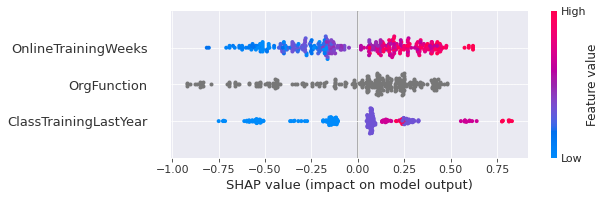

In [ ]:
import shap 
import graphviz
sns.set_style('darkgrid') 
 
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(model_lgb)
# obtain shap values for the first row of the test data
# obtain shap values for the test data
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[0:], X_test)

The results of the predictive model show that,
* It is possible to predict employee performance through online and class trainings and organizational department information. 
* Shap values show that higher values of Online trainings, also increase the performance score. Our explorotary analysis showed this relationship is due to the fact that Online trainings are highly correlated with performance score in IT deparment.

### **REFERENCES**

(1) https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset